## Convolutional Layers

The most important building block of a CNN is the convolutional layer: 6
neurons in the first convolutional layer are not connected to every single pixel in
the input image (like they were in the layers discussed in previous chapters), but
only to pixels in their receptive fields (see Figure 14-2). In turn, each neuron in
the second convolutional layer is connected only to neurons located within a
small rectangle in the first layer. This architecture allows the network to
concentrate on small low-level features in the first hidden layer, then assemble
them into larger higher-level features in the next hidden layer, and so on. This
hierarchical structure is common in real-world images, which is one of the
reasons why CNNs work so well for image recognition.

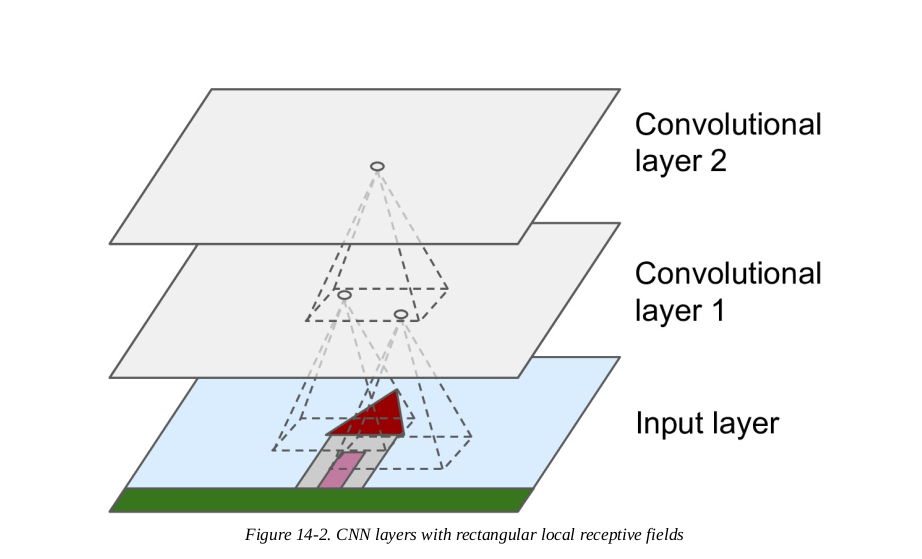

## Note

All the multilayer neural networks we’ve looked at so far had layers composed of a long line
of neurons, and we had to flatten input images to 1D before feeding them to the neural
network. In a CNN each layer is represented in 2D, which makes it easier to match neurons
with their corresponding inputs.


A neuron located in row i, column j of a given layer is connected to the outputs
of the neurons in the previous layer located in rows i to i + f h – 1, columns j to j
+ f w – 1, where f h and f w are the height and width of the receptive field (see
Figure 14-3). In order for a layer to have the same height and width as the
previous layer, it is common to add zeros around the inputs, as shown in the
diagram. This is called zero padding.

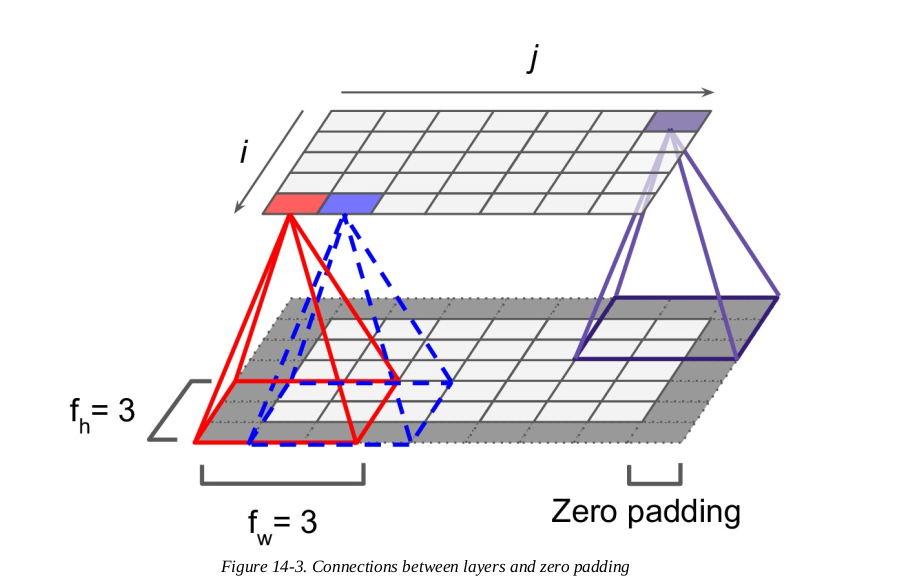

It is also possible to connect a large input layer to a much smaller layer by
spacing out the receptive fields, as shown in Figure 14-4. This dramatically
reduces the model’s computational complexity. The shift from one receptive
field to the next is called the stride. In the diagram, a 5 × 7 input layer (plus zero
padding) is connected to a 3 × 4 layer, using 3 × 3 receptive fields and a stride of
2 (in this example the stride is the same in both directions, but it does not have to
be so). A neuron located in row i, column j in the upper layer is connected to the
outputs of the neurons in the previous layer located in rows i × s h to i × s h + f h –
1, columns j × s w to j × s w + f w – 1, where s h and s w are the vertical and
horizontal strides.

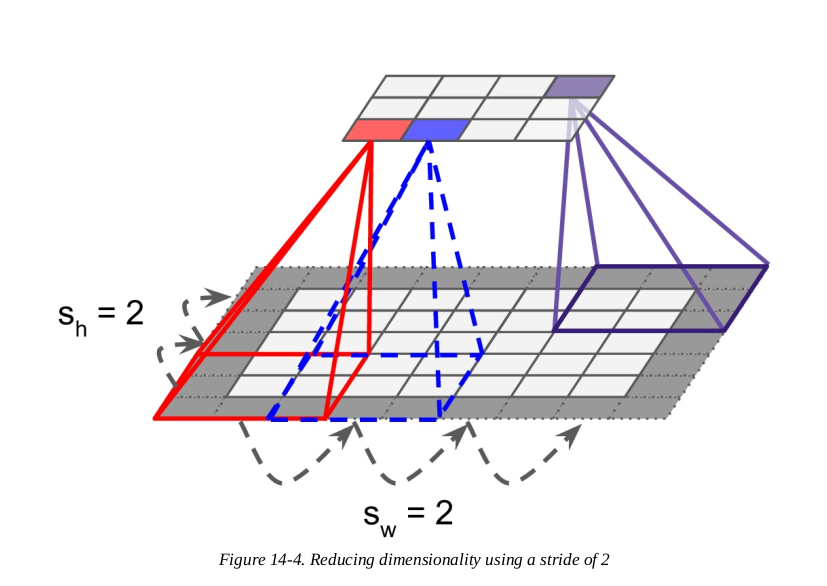

## Filters

A neuron’s weights can be represented as a small image the size of the receptive
field. For example, Figure 14-5 shows two possible sets of weights, called filters
(or convolution kernels). The first one is represented as a black square with a
vertical white line in the middle (it is a 7 × 7 matrix full of 0s except for the
central column, which is full of 1s); neurons using these weights will ignore
everything in their receptive field except for the central vertical line (since all
inputs will get multiplied by 0, except for the ones located in the central vertical
line). The second filter is a black square with a horizontal white line in the
middle. Once again, neurons using these weights will ignore everything in their
receptive field except for the central horizontal line.
Now if all neurons in a layer use the same vertical line filter (and the same bias
term), and you feed the network the input image shown in Figure 14-5 (the
bottom image), the layer will output the top-left image. Notice that the vertical
white lines get enhanced while the rest gets blurred. Similarly, the upper-right
image is what you get if all neurons use the same horizontal line filter; notice
that the horizontal white lines get enhanced while the rest is blurred out. Thus, a
layer full of neurons using the same filter outputs a feature map, which
highlights the areas in an image that activate the filter the most. Of course, you
do not have to define the filters manually: instead, during training the
convolutional layer will automatically learn the most useful filters for its task,
and the layers above will learn to combine them into more complex patterns.

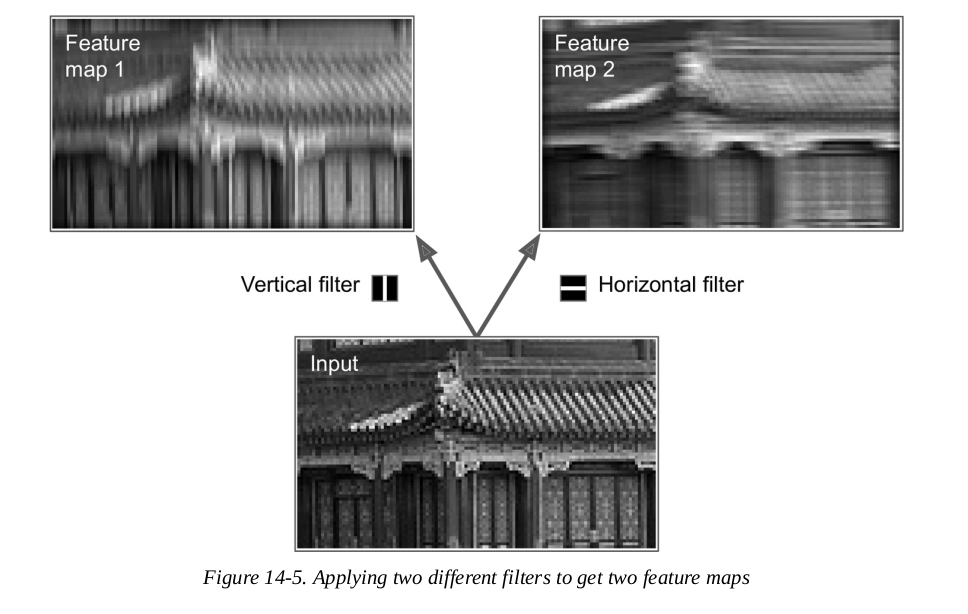

## Stacking Multiple Feature Maps

Up to now, for simplicity, I have represented the output of each convolutional
layer as a 2D layer, but in reality a convolutional layer has multiple filters (you
decide how many) and outputs one feature map per filter, so it is more accurately
represented in 3D (see Figure 14-6). It has one neuron per pixel in each feature
map, and all neurons within a given feature map share the same parameters (i.e.,
the same weights and bias term). Neurons in different feature maps use different
parameters. A neuron’s receptive field is the same as described earlier, but it
extends across all the previous layers’ feature maps. In short, a convolutional
layer simultaneously applies multiple trainable filters to its inputs, making it
capable of detecting multiple features anywhere in its inputs.


## Note
The fact that all neurons in a feature map share the same parameters dramatically reduces the
number of parameters in the model. Once the CNN has learned to recognize a pattern in one
location, it can recognize it in any other location. In contrast, once a regular DNN has learned
to recognize a pattern in one location, it can recognize it only in that particular location.



Input images are also composed of multiple sublayers: one per color channel.
There are typically three: red, green, and blue (RGB). Grayscale images have
just one channel, but some images may have much more—for example, satellite
images that capture extra light frequencies (such as infrared).

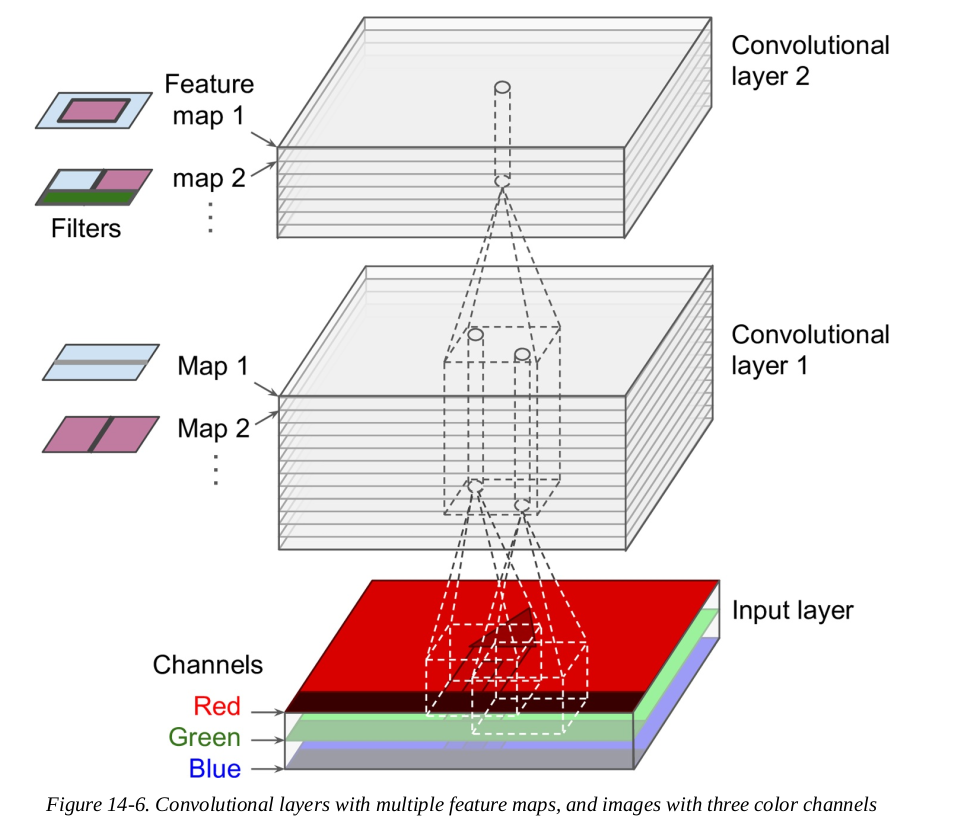

Specifically, a neuron located in row i, column j of the feature map k in a given
convolutional layer l is connected to the outputs of the neurons in the previous
layer l – 1, located in rows i × s h to i × s h + f h – 1 and columns j × s w to j × s w +
f w – 1, across all feature maps (in layer l – 1). Note that all neurons located in the
same row i and column j but in different feature maps are connected to the
outputs of the exact same neurons in the previous layer.
Equation 14-1 summarizes the preceding explanations in one big mathematical
equation: it shows how to compute the output of a given neuron in a
convolutional layer. It is a bit ugly due to all the different indices, but all it does
is calculate the weighted sum of all the inputs, plus the bias term.

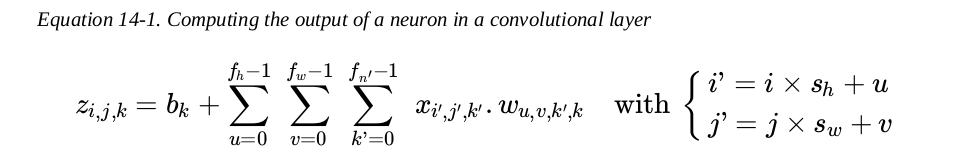

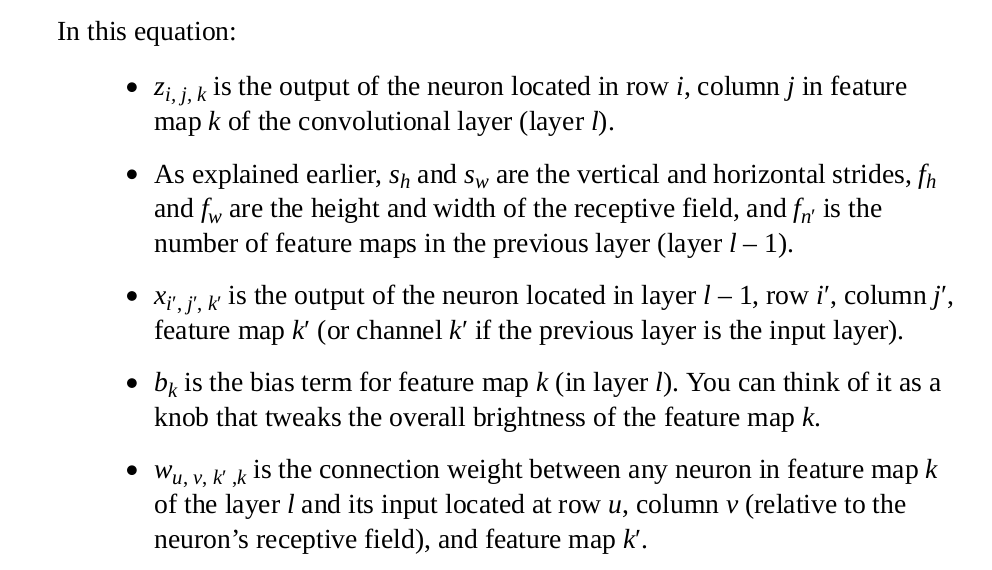


## TensorFlow Implementation

In TensorFlow, each input image is typically represented as a 3D tensor of shape
[height, width, channels]. A mini-batch is represented as a 4D tensor of shape
[mini-batch size, height, width, channels]. The weights of a convolutional layer
are represented as a 4D tensor of shape [f h , f w , f n′ , f n ]. The bias terms of a
convolutional layer are simply represented as a 1D tensor of shape [f n ].
Let’s look at a simple example. The following code loads two sample images,
using Scikit-Learn’s load_sample_image() (which loads two color images, one
of a Chinese temple, and the other of a flower), then it creates two filters and
applies them to both images, and finally it displays one of the resulting feature
maps:

In [3]:
# from sklearn.datasets import load_sample_image
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf

# # Load sample images
# china = load_sample_image("china.jpg") / 255
# flower = load_sample_image("flower.jpg") / 255
# images = np.array([china, flower])
# batch_size, height, width, channels = images.shape
# # Create 2 filters
# filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
# filters[:, 3, :, 0] = 1 # vertical line
# filters[3, :, :, 1] = 1 # horizontal line
# outputs = tf.nn.conv2d(images, filters, strides=1, padding="same")
# plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
# plt.show()

## Memory Requirements

Another problem with CNNs is that the convolutional layers require a huge
amount of RAM. This is especially true during training, because the reverse pass
of backpropagation requires all the intermediate values computed during the
forward pass.
For example, consider a convolutional layer with 5 × 5 filters, outputting 200
feature maps of size 150 × 100, with stride 1 and "same" padding. If the input is
a 150 × 100 RGB image (three channels), then the number of parameters is (5 ×
5 × 3 + 1) × 200 = 15,200 (the + 1 corresponds to the bias terms), which is fairly
small compared to a fully connected layer. 7 However, each of the 200 feature
maps contains 150 × 100 neurons, and each of these neurons needs to compute a
weighted sum of its 5 × 5 × 3 = 75 inputs: that’s a total of 225 million float
multiplications. Not as bad as a fully connected layer, but still quite
computationally intensive. Moreover, if the feature maps are represented using
32-bit floats, then the convolutional layer’s output will occupy 200 × 150 × 100
× 32 = 96 million bits (12 MB) of RAM. 8 And that’s just for one instance—if a
training batch contains 100 instances, then this layer will use up 1.2 GB of
RAM!

## Tip 

If training crashes because of an out-of-memory error, you can try reducing the mini-batch
size. Alternatively, you can try reducing dimensionality using a stride, or removing a few
layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you could distribute the
CNN across multiple devices.

## Pooling Layers

Once you understand how convolutional layers work, the pooling layers are
quite easy to grasp. Their goal is to subsample (i.e., shrink) the input image in
order to reduce the computational load, the memory usage, and the number of
parameters (thereby limiting the risk of overfitting).
Just like in convolutional layers, each neuron in a pooling layer is connected to
the outputs of a limited number of neurons in the previous layer, located within a
small rectangular receptive field. You must define its size, the stride, and the
padding type, just like before. However, a pooling neuron has no weights; all it
does is aggregate the inputs using an aggregation function such as the max or
mean. Figure 14-8 shows a max pooling layer, which is the most common type
of pooling layer.

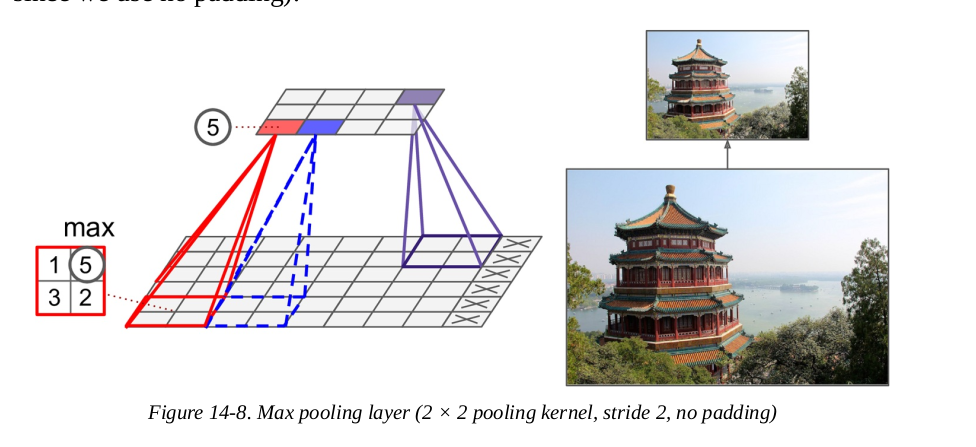

In this example, we use a 2 × 2 pooling kernel, 9 with a stride of
2 and no padding. Only the max input value in each receptive field makes it to
the next layer, while the other inputs are dropped. For example, in the lower-left
receptive field in Figure 14-8, the input values are 1, 5, 3, 2, so only the max
value, 5, is propagated to the next layer. Because of the stride of 2, the output
image has half the height and half the width of the input image (rounded down
since we use no padding).

### Note

A pooling layer typically works on every input channel independently, so the output depth is
the same as the input depth.

Other than reducing computations, memory usage, and the number of
parameters, a max pooling layer also introduces some level of invariance to
small translations, as shown in Figure 14-9. Here we assume that the bright
pixels have a lower value than dark pixels, and we consider three images (A, B,
C) going through a max pooling layer with a 2 × 2 kernel and stride 2. Images B
and C are the same as image A, but shifted by one and two pixels to the right. As
you can see, the outputs of the max pooling layer for images A and B are
identical. This is what translation invariance means. For image C, the output is
different: it is shifted one pixel to the right (but there is still 75% invariance). By
inserting a max pooling layer every few layers in a CNN, it is possible to get
some level of translation invariance at a larger scale. Moreover, max pooling
offers a small amount of rotational invariance and a slight scale invariance. Such
invariance (even if it is limited) can be useful in cases where the prediction
should not depend on these details, such as in classification tasks.

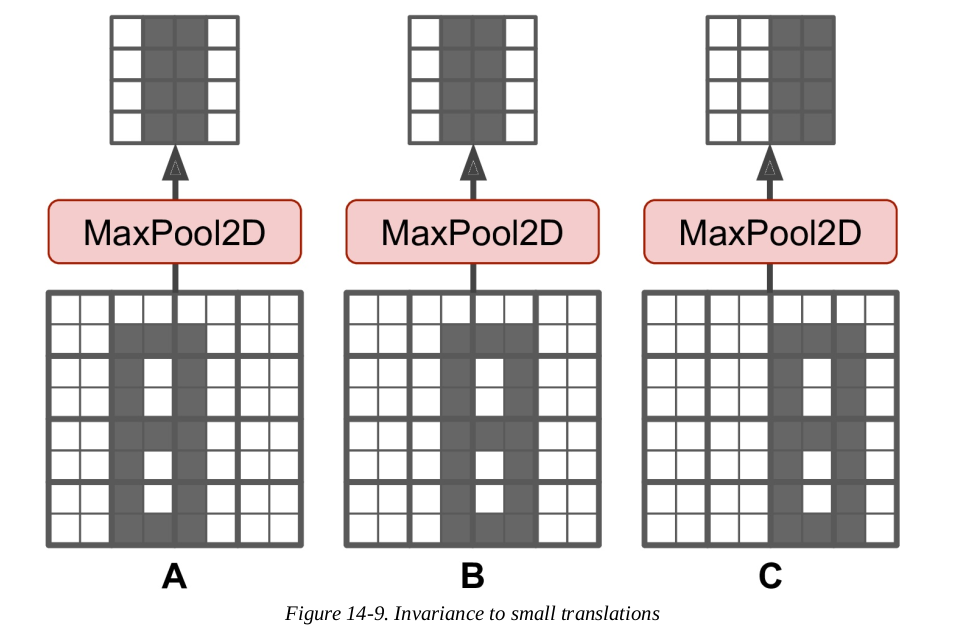

However, max pooling has some downsides too. Firstly, it is obviously very
destructive: even with a tiny 2 × 2 kernel and a stride of 2, the output will be two
times smaller in both directions (so its area will be four times smaller), simply
dropping 75% of the input values. And in some applications, invariance is not
desirable. Take semantic segmentation (the task of classifying each pixel in an
image according to the object that pixel belongs to, which we’ll explore later in
this chapter): obviously, if the input image is translated by one pixel to the right,
the output should also be translated by one pixel to the right. The goal in this
case is equivariance, not invariance: a small change to the inputs should lead to
a corresponding small change in the output.

## Tensorflow implementation


In [1]:
# max_pool = keras.layers.MaxPool2D(pool_size=2)

To create an average pooling layer, just use AvgPool2D instead of MaxPool2D.
As you might expect, it works exactly like a max pooling layer, except it
computes the mean rather than the max. Average pooling layers used to be very
popular, but people mostly use max pooling layers now, as they generally
perform better. This may seem surprising, since computing the mean generally
loses less information than computing the max. But on the other hand, max
pooling preserves only the strongest features, getting rid of all the meaningless
ones, so the next layers get a cleaner signal to work with. Moreover, max
pooling offers stronger translation invariance than average pooling, and it
requires slightly less compute.

Note that max pooling and average pooling can be performed along the depth
dimension rather than the spatial dimensions, although this is not as common.
This can allow the CNN to learn to be invariant to various features. For example,
it could learn multiple filters, each detecting a different rotation of the same
pattern (such as hand-written digits; see Figure 14-10), and the depthwise max
pooling layer would ensure that the output is the same regardless of the rotation.
The CNN could similarly learn to be invariant to anything else: thickness,brightness, skew, color, and so on.

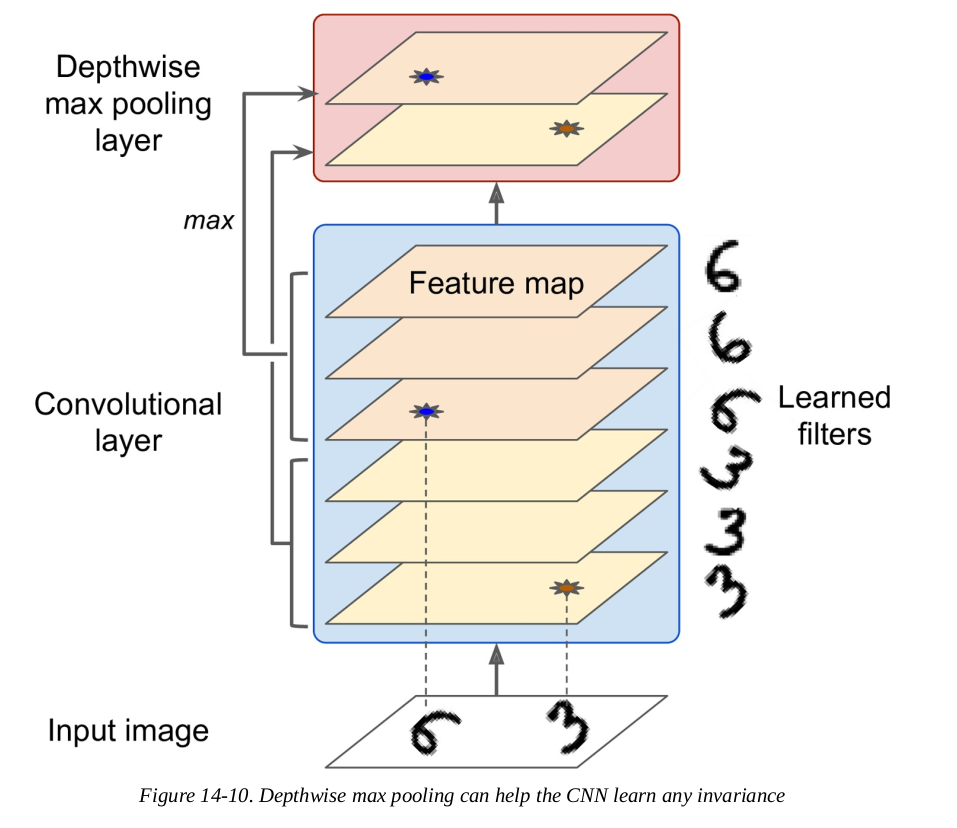

Keras does not include a depthwise max pooling layer, but TensorFlow’s low-
level Deep Learning API does: just use the tf.nn.max_pool() function, and
specify the kernel size and strides as 4-tuples (i.e., tuples of size 4). The first
three values of each should be 1: this indicates that the kernel size and stride
along the batch, height, and width dimensions should be 1. The last value should
be whatever kernel size and stride you want along the depth dimension—for
example, 3 (this must be a divisor of the input depth; it will not work if the
previous layer outputs 20 feature maps, since 20 is not a multiple of 3):

In [3]:
# output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3),strides=(1, 1, 1, 3),padding="valid")

# If you want to include this as a layer in your Keras models, wrap it in a Lambda
# layer (or create a custom Keras layer):

# depth_pool = keras.layers.Lambda(
#             lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3),
#             strides=(1, 1, 1, 3),
#             padding="valid"))


# One last type of pooling layer that you will often see in modern architectures is
# the global average pooling layer. It works very differently: all it does is compute
# the mean of each entire feature map (it’s like an average pooling layer using a
# pooling kernel with the same spatial dimensions as the inputs). This means that it
# just outputs a single number per feature map and per instance. Although this is
# of course extremely destructive (most of the information in the feature map is
# lost), it can be useful as the output layer, as we will see later in this chapter. To
# create such a layer, simply use the keras.layers.GlobalAvgPool2D class:

# global_avg_pool = keras.layers.GlobalAvgPool2D()

## CNN Architectures

Typical CNN architectures stack a few convolutional layers (each one generally
followed by a ReLU layer), then a pooling layer, then another few convolutional
layers (+ReLU), then another pooling layer, and so on. The image gets smaller
and smaller as it progresses through the network, but it also typically gets deeper
and deeper (i.e., with more feature maps), thanks to the convolutional layers (see
Figure 14-11). At the top of the stack, a regular feedforward neural network is
added, composed of a few fully connected layers (+ReLUs), and the final layer
outputs the prediction (e.g., a softmax layer that outputs estimated class
probabilities).

## Tip

A common mistake is to use convolution kernels that are too large. For example, instead of
using a convolutional layer with a 5 × 5 kernel, stack two layers with 3 × 3 kernels: it will use
fewer parameters and require fewer computations, and it will usually perform better. One
exception is for the first convolutional layer: it can typically have a large kernel (e.g., 5 × 5),
usually with a stride of 2 or more: this will reduce the spatial dimension of the image without
losing too much information, and since the input image only has three channels in general, it
will not be too costly.

Here is how you can implement a simple CNN to tackle the Fashion MNIST
dataset (introduced in Chapter 10):

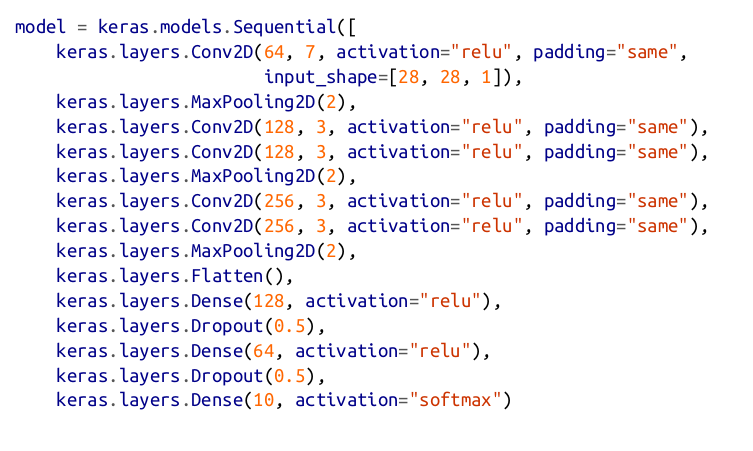

#### Let’s go through this model:
    * The first layer uses 64 fairly large filters (7 × 7) but no stride because
    the input images are not very large. It also sets input_shape=[28, 28,
    1], because the images are 28 × 28 pixels, with a single color channel
    (i.e., grayscale).
    
    * Next we have a max pooling layer which uses a pool size of 2, so it
    divides each spatial dimension by a factor of 2.
    
    * Then we repeat the same structure twice: two convolutional layers
    followed by a max pooling layer. For larger images, we could repeat
    this structure several more times (the number of repetitions is a
    hyperparameter you can tune).
    
    * Note that the number of filters grows as we climb up the CNN toward
    the output layer (it is initially 64, then 128, then 256): it makes sense for
    it to grow, since the number of low-level features is often fairly low
    (e.g., small circles, horizontal lines), but there are many different ways
    to combine them into higher-level features. It is a common practice to
    double the number of filters after each pooling layer: since a pooling
    layer divides each spatial dimension by a factor of 2, we can afford to
    double the number of feature maps in the next layer without fear of
    exploding the number of parameters, memory usage, or computational
    load.
    
    * Next is the fully connected network, composed of two hidden dense
    layers and a dense output layer. Note that we must flatten its inputs,
    since a dense network expects a 1D array of features for each instance.
    We also add two dropout layers, with a dropout rate of 50% each, to
    reduce overfitting.
    
This CNN reaches over 92% accuracy on the test set. It’s not state of the art, but
it is pretty good, and clearly much better than what we achieved with dense
networks in Chapter 10.

Over the years, variants of this fundamental architecture have been developed,
leading to amazing advances in the field. A good measure of this progress is the
error rate in competitions such as the ILSVRC ImageNet challenge. In this
competition the top-five error rate for image classification fell from over 26% to
less than 2.3% in just six years. The top-five error rate is the number of test
images for which the system’s top five predictions did not include the correct
answer. The images are large (256 pixels high) and there are 1,000 classes, some
of which are really subtle (try distinguishing 120 dog breeds). Looking at the
evolution of the winning entries is a good way to understand how CNNs work.
We will first look at the classical LeNet-5 architecture (1998), then three of the
winners of the ILSVRC challenge: AlexNet (2012), GoogLeNet (2014), and
ResNet (2015).

## LeNet-5

The LeNet-5 architecture 10 is perhaps the most widely known CNN architecture.
As mentioned earlier, it was created by Yann LeCun in 1998 and has been
widely used for handwritten digit recognition (MNIST). It is composed of the
layers shown in Table 14-1.

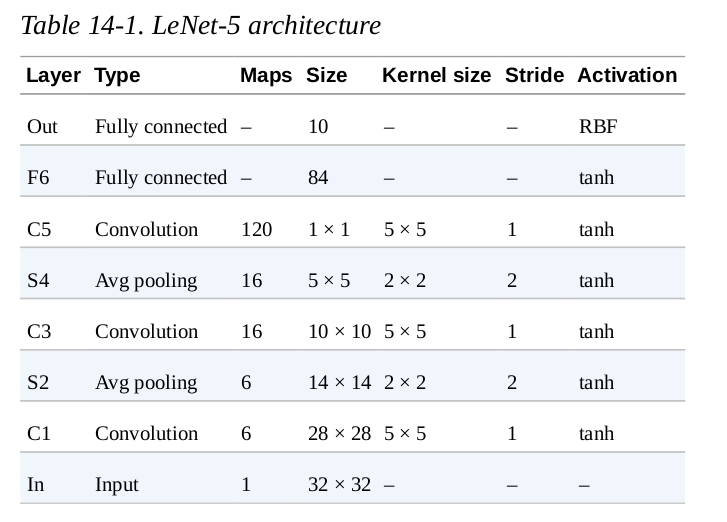

There are a few extra details to be noted:

    MNIST images are 28 × 28 pixels, but they are zero-padded to 32 × 32
    pixels and normalized before being fed to the network. The rest of the
    network does not use any padding, which is why the size keeps
    shrinking as the image progresses through the network.
       
    The average pooling layers are slightly more complex than usual: each
    neuron computes the mean of its inputs, then multiplies the result by a
    learnable coefficient (one per map) and adds a learnable bias term
    (again, one per map), then finally applies the activation function.
       
    Most neurons in C3 maps are connected to neurons in only three or four
    S2 maps (instead of all six S2 maps). See table 1 (page 8) in the original
    paper 10 for details.
    
    The output layer is a bit special: instead of computing the matrix
    multiplication of the inputs and the weight vector, each neuron outputs
    the square of the Euclidian distance between its input vector and its
    weight vector. Each output measures how much the image belongs to a
    particular digit class. The cross-entropy cost function is now preferred,
    as it penalizes bad predictions much more, producing larger gradients
    and converging faster.
    
Yann LeCun’s website features great demos of LeNet-5 classifying digits.

## AlexNet

The AlexNet CNN architecture 11 won the 2012 ImageNet ILSVRC challenge by
a large margin: it achieved a top-five error rate of 17%, while the second best
achieved only 26%! It was developed by Alex Krizhevsky (hence the name),
Ilya Sutskever, and Geoffrey Hinton. It is similar to LeNet-5, only much larger
and deeper, and it was the first to stack convolutional layers directly on top of
one another, instead of stacking a pooling layer on top of each convolutional
layer. Table 14-2 presents this architecture.

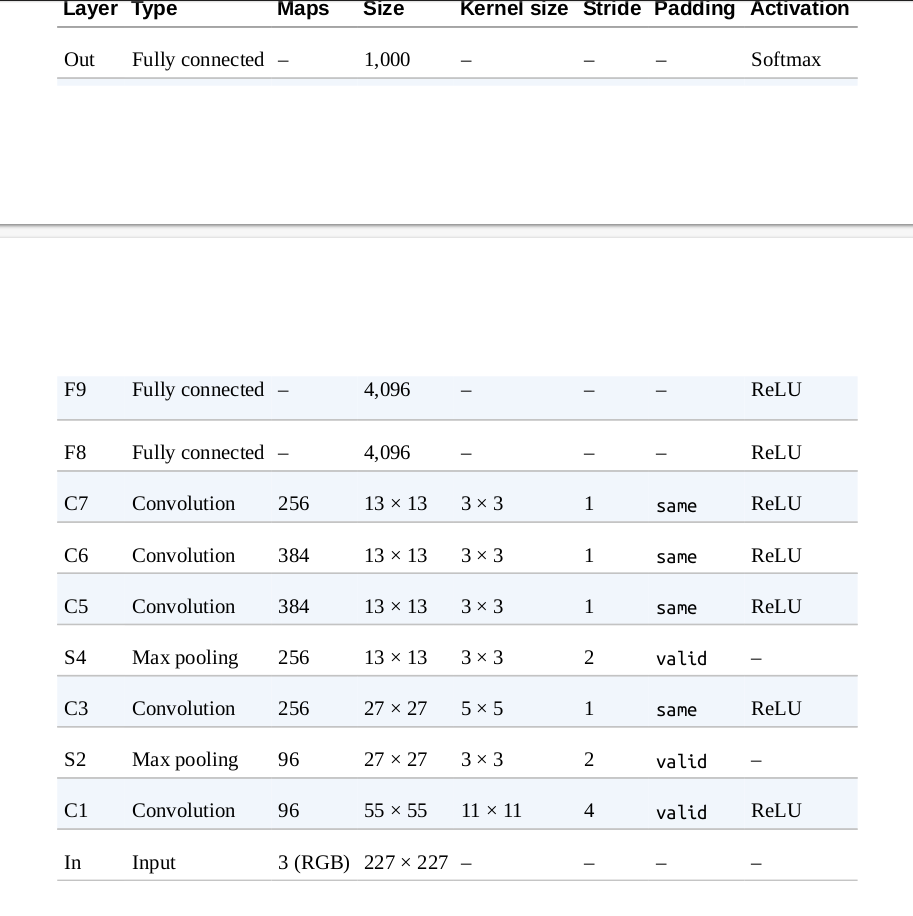

To reduce overfitting, the authors used two regularization techniques. First, they
applied dropout (introduced in Chapter 11) with a 50% dropout rate during
training to the outputs of layers F8 and F9. Second, they performed data
augmentation by randomly shifting the training images by various offsets,
flipping them horizontally, and changing the lighting conditions.

## Data Augmentation

Data augmentation artificially increases the size of the training set by
generating many realistic variants of each training instance. This reduces
overfitting, making this a regularization technique. The generated instances
should be as realistic as possible: ideally, given an image from the
augmented training set, a human should not be able to tell whether it was
augmented or not. Simply adding white noise will not help; the
modifications should be learnable (white noise is not).

For example, you can slightly shift, rotate, and resize every picture in the
training set by various amounts and add the resulting pictures to the training
set (see Figure 14-12). This forces the model to be more tolerant to
variations in the position, orientation, and size of the objects in the pictures.
For a model that’s more tolerant of different lighting conditions, you can
similarly generate many images with various contrasts. In general, you can
also flip the pictures horizontally (except for text, and other asymmetrical
objects). By combining these transformations, you can greatly increase the
size of your training set.

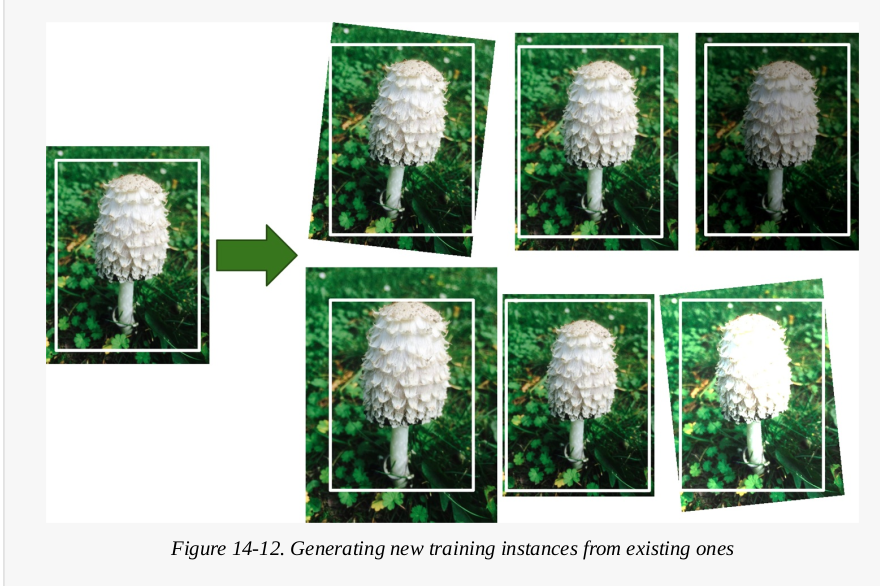

AlexNet also uses a competitive normalization step immediately after the ReLU
step of layers C1 and C3, called local response normalization (LRN): the most
strongly activated neurons inhibit other neurons located at the same position in
neighboring feature maps (such competitive activation has been observed in
biological neurons). This encourages different feature maps to specialize,
pushing them apart and forcing them to explore a wider range of features,
ultimately improving generalization. Equation 14-2 shows how to apply LRN.

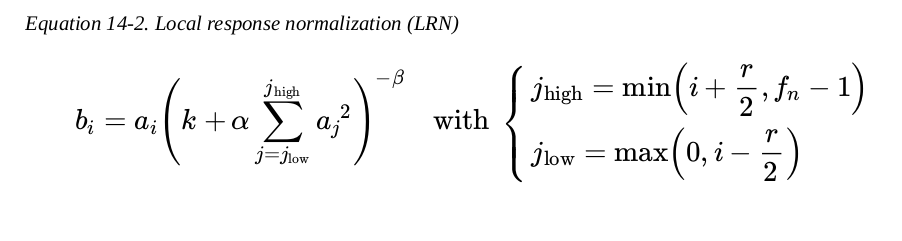
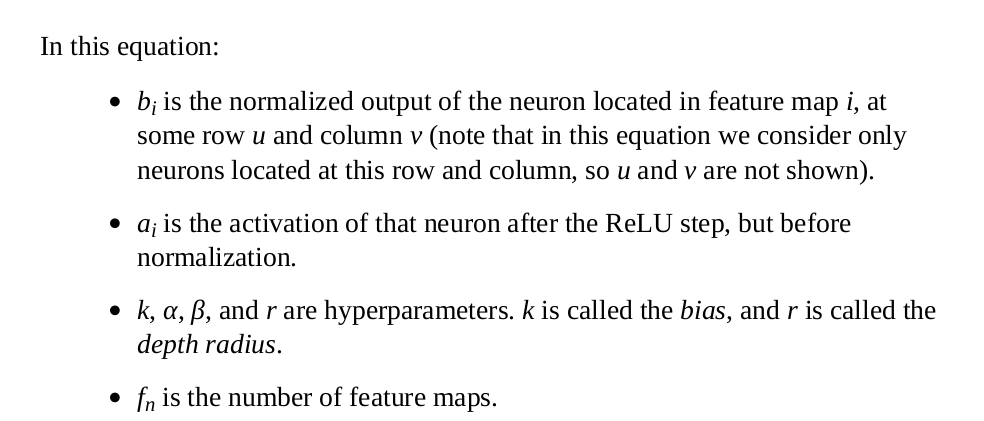


## GoogLeNet

The GoogLeNet architecture was developed by Christian Szegedy et al. from
Google Research, 13 and it won the ILSVRC 2014 challenge by pushing the top-
five error rate below 7%. This great performance came in large part from the fact
that the network was much deeper than previous CNNs (as you’ll see in
Figure 14-14). This was made possible by subnetworks called inception
modules, 14 which allow GoogLeNet to use parameters much more efficiently
than previous architectures: GoogLeNet actually has 10 times fewer parameters
than AlexNet (roughly 6 million instead of 60 million).
Figure 14-13 shows the architecture of an inception module. The notation “3 × 3
1(S)” means that the layer uses a 3 × 3 kernel, stride 1, and "same" padding.

The input signal is first copied and fed to four different layers. All convolutional
layers use the ReLU activation function. Note that the second set of
convolutional layers uses different kernel sizes (1 × 1, 3 × 3, and 5 × 5),
allowing them to capture patterns at different scales. Also note that every single
layer uses a stride of 1 and "same" padding (even the max pooling layer), so
their outputs all have the same height and width as their inputs. This makes it
possible to concatenate all the outputs along the depth dimension in the final
depth concatenation layer (i.e., stack the feature maps from all four top
convolutional layers). This concatenation layer can be implemented in
TensorFlow using the tf.concat() operation, with axis=3 (the axis is the
depth).

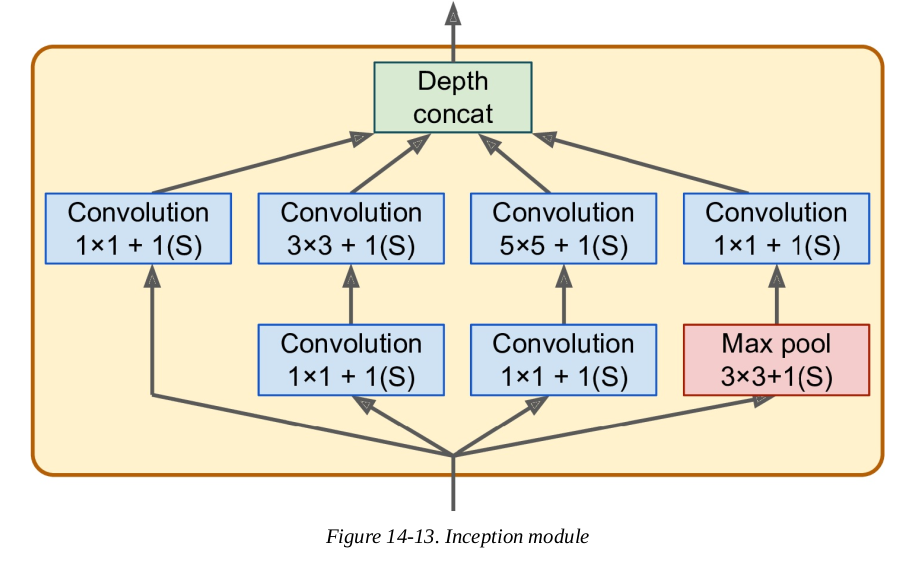

You may wonder why inception modules have convolutional layers with 1 × 1
kernels. Surely these layers cannot capture any features because they look at
only one pixel at a time? In fact, the layers serve three purposes:

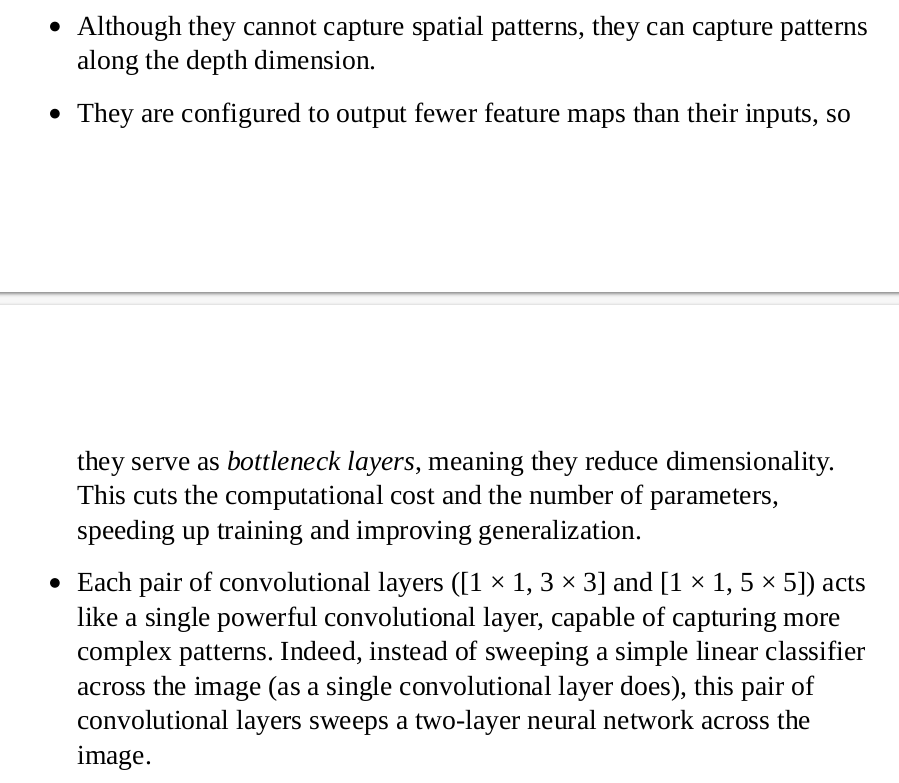

In short, you can think of the whole inception module as a convolutional layer
on steroids, able to output feature maps that capture complex patterns at various
scales.

#### WARNING
The number of convolutional kernels for each convolutional layer is a hyperparameter.
Unfortunately, this means that you have six more hyperparameters to tweak for every inception
layer you add.

Now let’s look at the architecture of the GoogLeNet CNN (see Figure 14-14).
The number of feature maps output by each convolutional layer and each
pooling layer is shown before the kernel size. The architecture is so deep that it
has to be represented in three columns, but GoogLeNet is actually one tall stack,
including nine inception modules (the boxes with the spinning tops). The six
numbers in the inception modules represent the number of feature maps output
by each convolutional layer in the module (in the same order as in Figure 14-13).
Note that all the convolutional layers use the ReLU activation function.

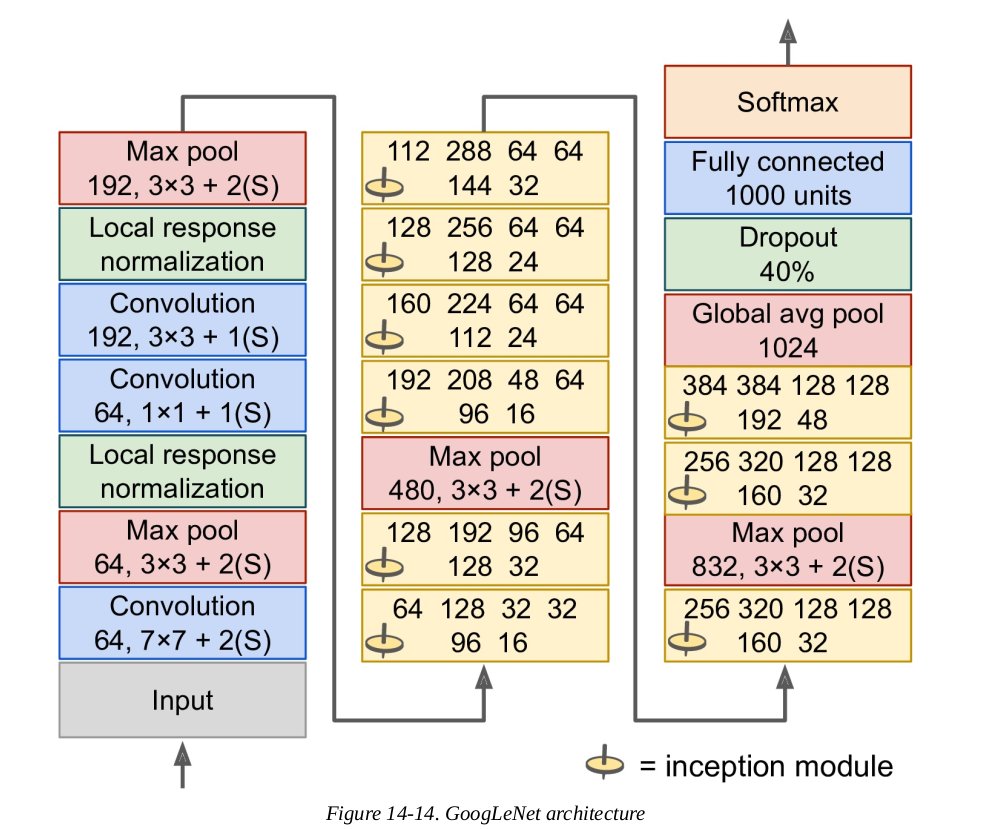

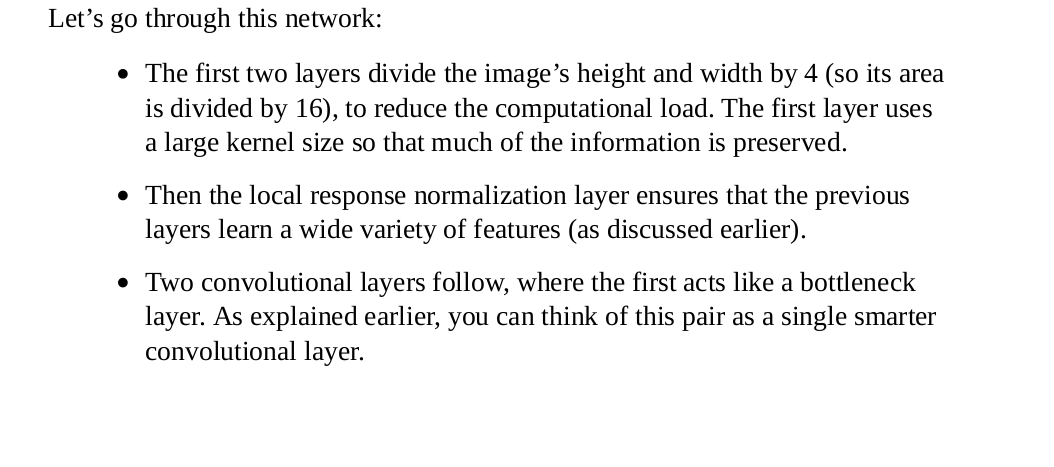
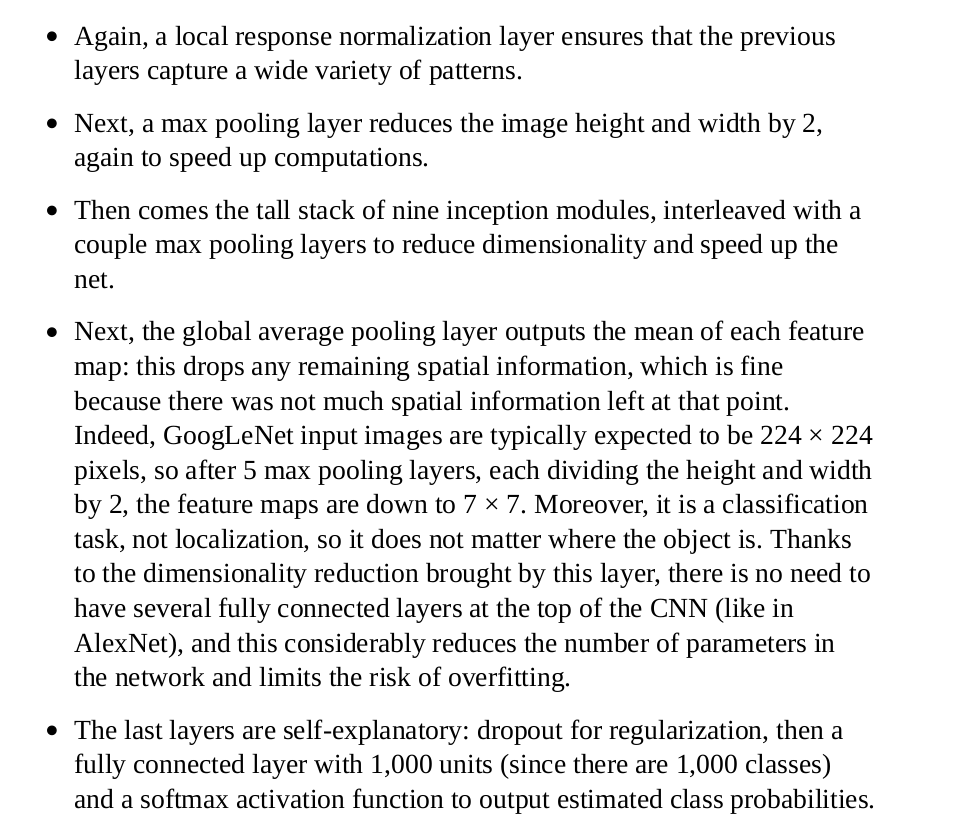


## VGGNet

The runner-up in the ILSVRC 2014 challenge was VGGNet, 15 developed by
Karen Simonyan and Andrew Zisserman from the Visual Geometry Group
(VGG) research lab at Oxford University. It had a very simple and classical
architecture, with 2 or 3 convolutional layers and a pooling layer, then again 2 or
3 convolutional layers and a pooling layer, and so on (reaching a total of just 16
or 19 convolutional layers, depending on the VGG variant), plus a final dense
network with 2 hidden layers and the output layer. It used only 3 × 3 filters, but
many filters.

## ResNet

Kaiming He et al. won the ILSVRC 2015 challenge using a Residual Network
(or ResNet), 16 that delivered an astounding top-five error rate under 3.6%. The
winning variant used an extremely deep CNN composed of 152 layers (other
variants had 34, 50, and 101 layers). It confirmed the general trend: models are
getting deeper and deeper, with fewer and fewer parameters. The key to being
able to train such a deep network is to use skip connections (also called shortcut
connections): the signal feeding into a layer is also added to the output of a layer
located a bit higher up the stack. Let’s see why this is useful.
When training a neural network, the goal is to make it model a target function
h(x). If you add the input x to the output of the network (i.e., you add a skip
connection), then the network will be forced to model f(x) = h(x) – x rather than
h(x). This is called residual learning (see Figure 14-15).

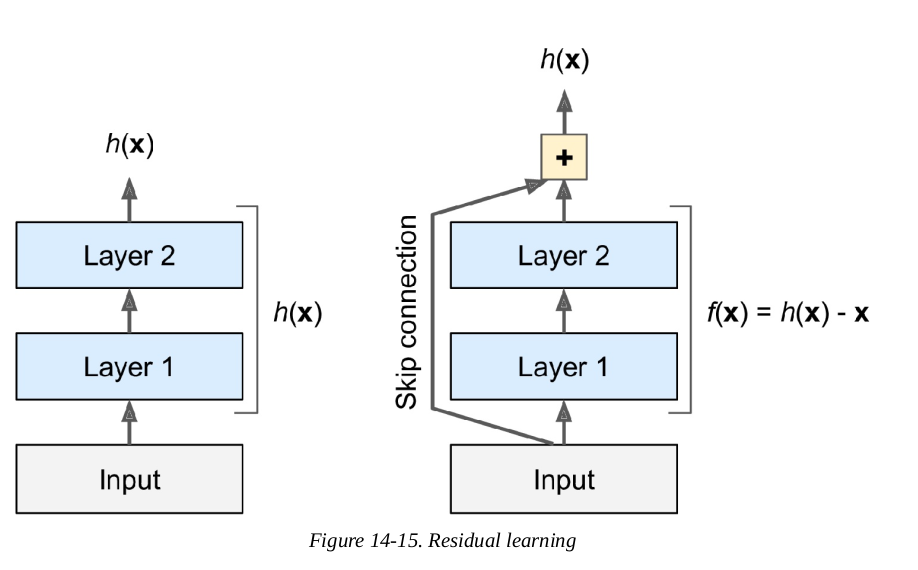

When you initialize a regular neural network, its weights are close to zero, so the
network just outputs values close to zero. If you add a skip connection, the
resulting network just outputs a copy of its inputs; in other words, it initially
models the identity function. If the target function is fairly close to the identity
function (which is often the case), this will speed up training considerably.
Moreover, if you add many skip connections, the network can start making
progress even if several layers have not started learning yet (see Figure 14-16).
Thanks to skip connections, the signal can easily make its way across the whole
network. The deep residual network can be seen as a stack of residual units
(RUs), where each residual unit is a small neural network with a skip
connection.

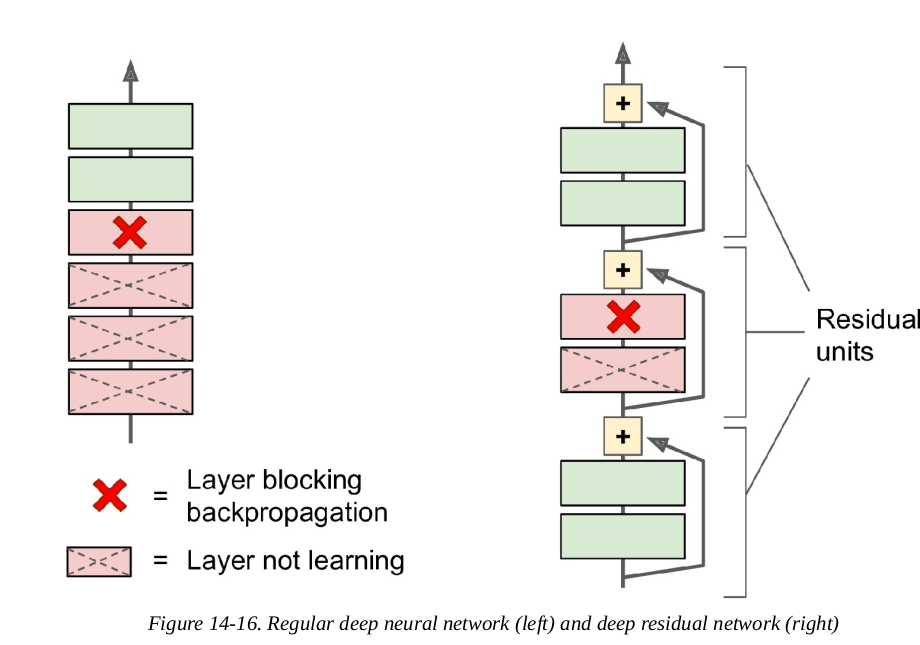

Now let’s look at ResNet’s architecture (see Figure 14-17). It is surprisingly
simple. It starts and ends exactly like GoogLeNet (except without a dropout
layer), and in between is just a very deep stack of simple residual units. Each
residual unit is composed of two convolutional layers (and no pooling layer!),
with Batch Normalization (BN) and ReLU activation, using 3 × 3 kernels and
preserving spatial dimensions (stride 1, "same" padding).

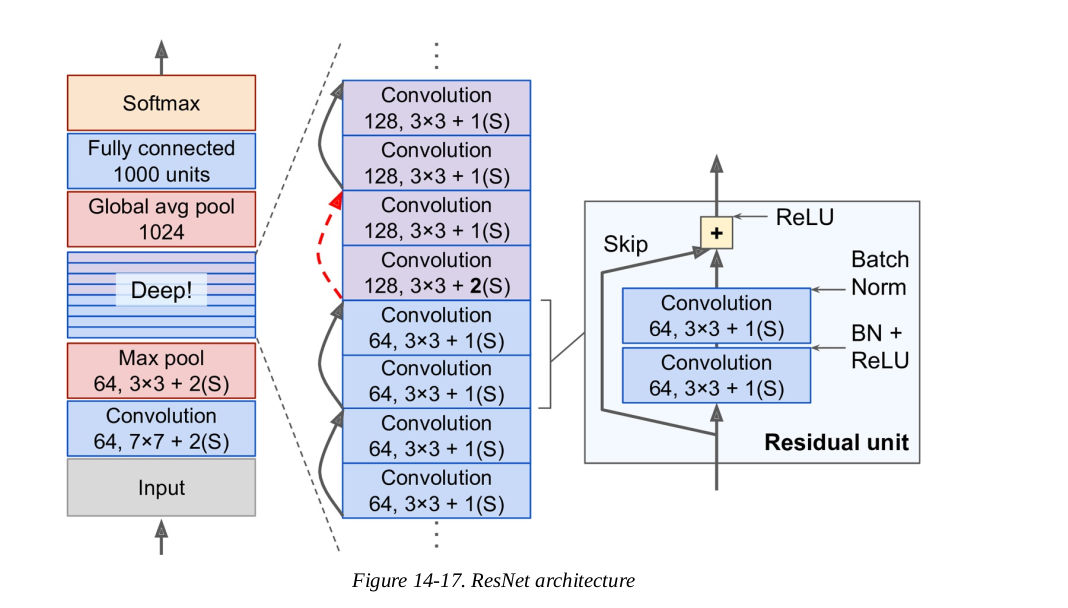

Note that the number of feature maps is doubled every few residual units, at the
same time as their height and width are halved (using a convolutional layer with
stride 2). When this happens, the inputs cannot be added directly to the outputs
of the residual unit because they don’t have the same shape (for example, this
problem affects the skip connection represented by the dashed arrow in
Figure 14-17). To solve this problem, the inputs are passed through a 1 × 1
convolutional layer with stride 2 and the right number of output feature maps
(see Figure 14-18).

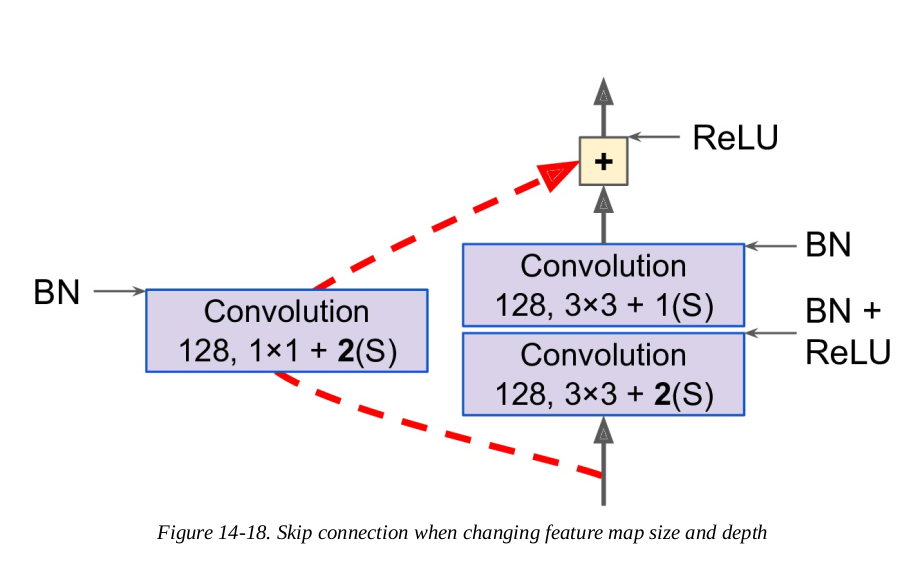

ResNet-34 is the ResNet with 34 layers (only counting the convolutional layers
and the fully connected layer) 17 containing 3 residual units that output 64 feature
maps, 4 RUs with 128 maps, 6 RUs with 256 maps, and 3 RUs with 512 maps.
We will implement this architecture later in this chapter.
ResNets deeper than that, such as ResNet-152, use slightly different residual
units. Instead of two 3 × 3 convolutional layers with, say, 256 feature maps, they
use three convolutional layers: first a 1 × 1 convolutional layer with just 64
feature maps (4 times less), which acts as a bottleneck layer (as discussed
already), then a 3 × 3 layer with 64 feature maps, and finally another 1 × 1
convolutional layer with 256 feature maps (4 times 64) that restores the original
depth. ResNet-152 contains 3 such RUs that output 256 maps, then 8 RUs with
512 maps, a whopping 36 RUs with 1,024 maps, and finally 3 RUs with 2,048
maps.

### Note

Google’s Inception-v4 18 architecture merged the ideas of GoogLeNet and ResNet and
achieved a top-five error rate of close to 3% on ImageNet classification.

## Xception
## SENet